In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load data
df = pd.read_csv("All_Service_Requests_-_2023.csv")
# check data
df.head()

,X,Y,SERVICEREQUESTID,STREETADDRESS,CITY,STATE,ZIPCODE,WARD,SERVICECODE,SERVICECODEDESCRIPTION,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,MARADDRESSREPOSITORYID,GLOBALID,CREATED,EDITED,SE_ANNO_CAD_DATA,OBJECTID
0,398389.57,138810.810,23-00000008,2019 5TH STREET NW,WASHINGTON,DC,20001.0,Ward 1,S0261,Parking Enforcement,...,398389.570000,138810.810000,38.917164,-77.018570,229609,{F12E953E-26CA-1E18-E053-782F520AC63D},NaN,NaN,NaN,10579627
1,399970.25,134587.110,23-00000013,401 I STREET SE,WASHINGTON,DC,20003.0,Ward 6,S0261,Parking Enforcement,...,399970.250000,134587.110000,38.879117,-77.000343,288070,{F12F0091-4F4F-7AFF-E053-782F520A8FBD},NaN,NaN,NaN,10579628
2,396870.76,137775.610,23-00000016,1 SCOTT CIRCLE NW,WASHINGTON,DC,20036.0,Ward 2,S0261,Parking Enforcement,...,396870.760000,137775.610000,38.907835,-77.036078,226023,{F12FD71E-2F7B-73EA-E053-782F520A3044},NaN,NaN,NaN,10579629
3,396618.45,139476.897,23-00000019,17TH STREET NW AND EUCLID STREET NW,WASHINGTON,DC,20009.0,Ward 1,11,Dead Animal Collection,...,396618.450011,139476.897005,38.923159,-77.038996,903153,{F133316E-92E2-3EF1-E053-782F520A0ED7},NaN,NaN,NaN,10579630
4,396444.08,139396.240,23-00000031,2375 CHAMPLAIN STREET NW,WASHINGTON,DC,20009.0,Ward 1,S0261,Parking Enforcement,...,396444.080000,139396.240000,38.922432,-77.041006,284376,{F133D25D-1A13-669C-E053-782F520A7D47},NaN,NaN,NaN,10579631


In [4]:
# make new column for due time and actual response time (hours)
for col in ["ADDDATE", "SERVICEDUEDATE", "RESOLUTIONDATE"]:
    df[col] = pd.to_datetime(df[col], errors="coerce")

df["DUE_TIME_HOURS"] = (df["SERVICEDUEDATE"] - df["ADDDATE"]).dt.total_seconds() / 3600
df["RESPONSE_TIME_HOURS"] = (df["RESOLUTIONDATE"] - df["ADDDATE"]).dt.total_seconds() / 3600

df[["ADDDATE", "SERVICEDUEDATE", "RESOLUTIONDATE", "DUE_TIME_HOURS", "RESPONSE_TIME_HOURS"]].head()

,ADDDATE,SERVICEDUEDATE,RESOLUTIONDATE,DUE_TIME_HOURS,RESPONSE_TIME_HOURS
0,2023-01-01 05:54:29+00:00,2023-01-03 05:54:28+00:00,2023-01-01 11:36:13+00:00,47.999722,5.695556
1,2023-01-01 06:28:39+00:00,2023-01-03 06:28:38+00:00,2023-01-01 11:36:53+00:00,47.999722,5.137222
2,2023-01-01 07:27:54+00:00,2023-01-03 07:27:53+00:00,2023-01-01 11:37:30+00:00,47.999722,4.160000
3,2023-01-01 11:25:58+00:00,2023-01-04 11:25:58+00:00,2023-01-03 19:49:13+00:00,72.000000,56.387500
4,2023-01-01 12:11:44+00:00,2023-01-03 12:11:44+00:00,2023-01-01 12:30:20+00:00,48.000000,0.310000


(array([0.35421407, 0.08952065, 0.13031399, 0.14460672, 0.13316327,
        0.11267394, 0.09326178, 0.07738226, 0.06230193, 0.04795129,
        0.0321181 , 0.02324595, 0.03073979, 0.05857238, 0.12742997,
        0.18610659, 0.14767606, 0.04225273, 0.13054564, 0.10624569,
        0.17217292, 0.15627023, 0.23303862, 0.23440535, 0.27859234,
        0.35453838, 0.23420845, 0.12634122, 0.11861573, 0.1218009 ,
        0.08808443, 0.06579982, 0.0735948 , 0.06598514, 0.05422897,
        0.04532207, 0.04014472, 0.03927604, 0.03243082, 0.03587081,
        0.04515992, 0.03157372, 0.02385982, 0.0193195 , 0.02973211,
        0.01901836, 0.01315765, 0.00683364, 0.00525843, 0.00116983]),
 array([ 0.        ,  0.20424305,  0.40848609,  0.61272914,  0.81697218,
         1.02121523,  1.22545827,  1.42970132,  1.63394437,  1.83818741,
         2.04243046,  2.2466735 ,  2.45091655,  2.65515959,  2.85940264,
         3.06364569,  3.26788873,  3.47213178,  3.67637482,  3.88061787,
         4.08486091,  4.28

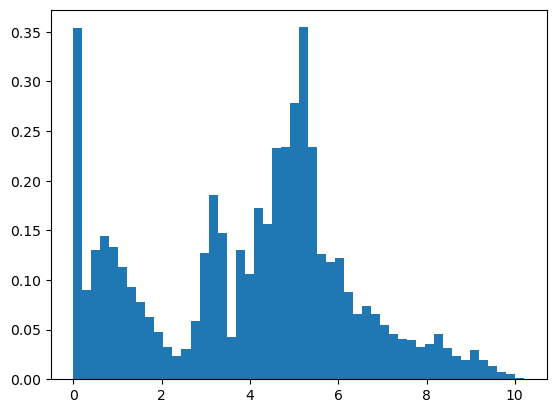

In [5]:
plt.hist(np.log(1+df["RESPONSE_TIME_HOURS"]), bins=50, density=True)

Text(0.5, 1.0, 'Due Time vs Response Time for 311 Service Requests')

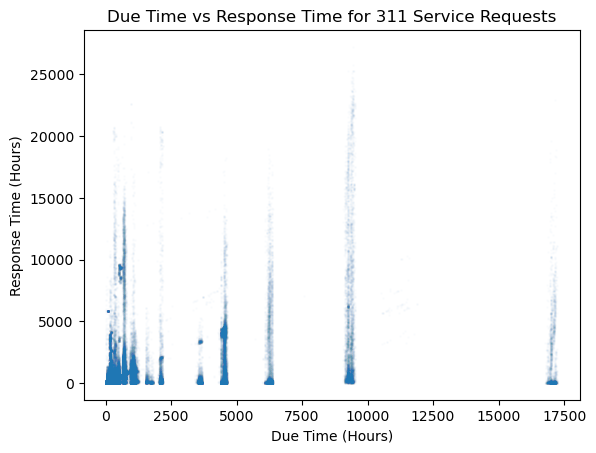

In [6]:
x_min, x_max = df["DUE_TIME_HOURS"].min(), df["DUE_TIME_HOURS"].max()
plt.scatter(df["DUE_TIME_HOURS"], df["RESPONSE_TIME_HOURS"], s=1.0, alpha=0.01)
# plt.plot(np.linspace(x_min, x_max, 100), np.linspace(x_min, x_max, 100), "r--")  # line y=x for reference
# plt.ylim(-1, 48)  # restrict y-axis to 48 hours for better visualization
# plt.xlim(0, 24)  # restrict x-axis to 24 hours for better visualization
plt.xlabel("Due Time (Hours)")
plt.ylabel("Response Time (Hours)")
plt.title("Due Time vs Response Time for 311 Service Requests")


Text(0.5, 1.0, 'Due Time vs Response Time for Parking Enforcement Requests')

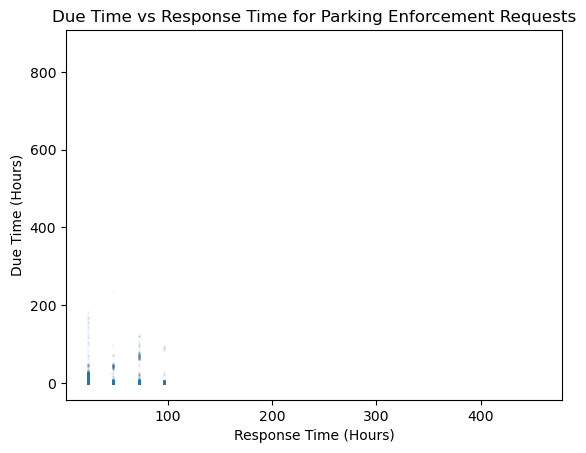

In [7]:
plt.scatter(df[df['SERVICECODEDESCRIPTION'] == "Parking Enforcement"]["DUE_TIME_HOURS"],
            df[df['SERVICECODEDESCRIPTION'] == "Parking Enforcement"]["RESPONSE_TIME_HOURS"], s=1.0, alpha=0.01)
plt.xlabel("Response Time (Hours)")
plt.ylabel("Due Time (Hours)")
# plt.xlim(0, 24)  # restrict x-axis to 24 hours for better visualization
# plt.ylim(-1, 48)  # restrict y-axis to 48 hours for better visualization
plt.title("Due Time vs Response Time for Parking Enforcement Requests")

In [8]:
# now filter by ward: plot histograms for actual response times for different wards 
df_ward = df.dropna(subset=["WARD"]).groupby("WARD", as_index=False)

Ward 1
Ward 6
Ward 2
Ward 5
Ward 7
Ward 4
Ward 8
Ward 3
Null


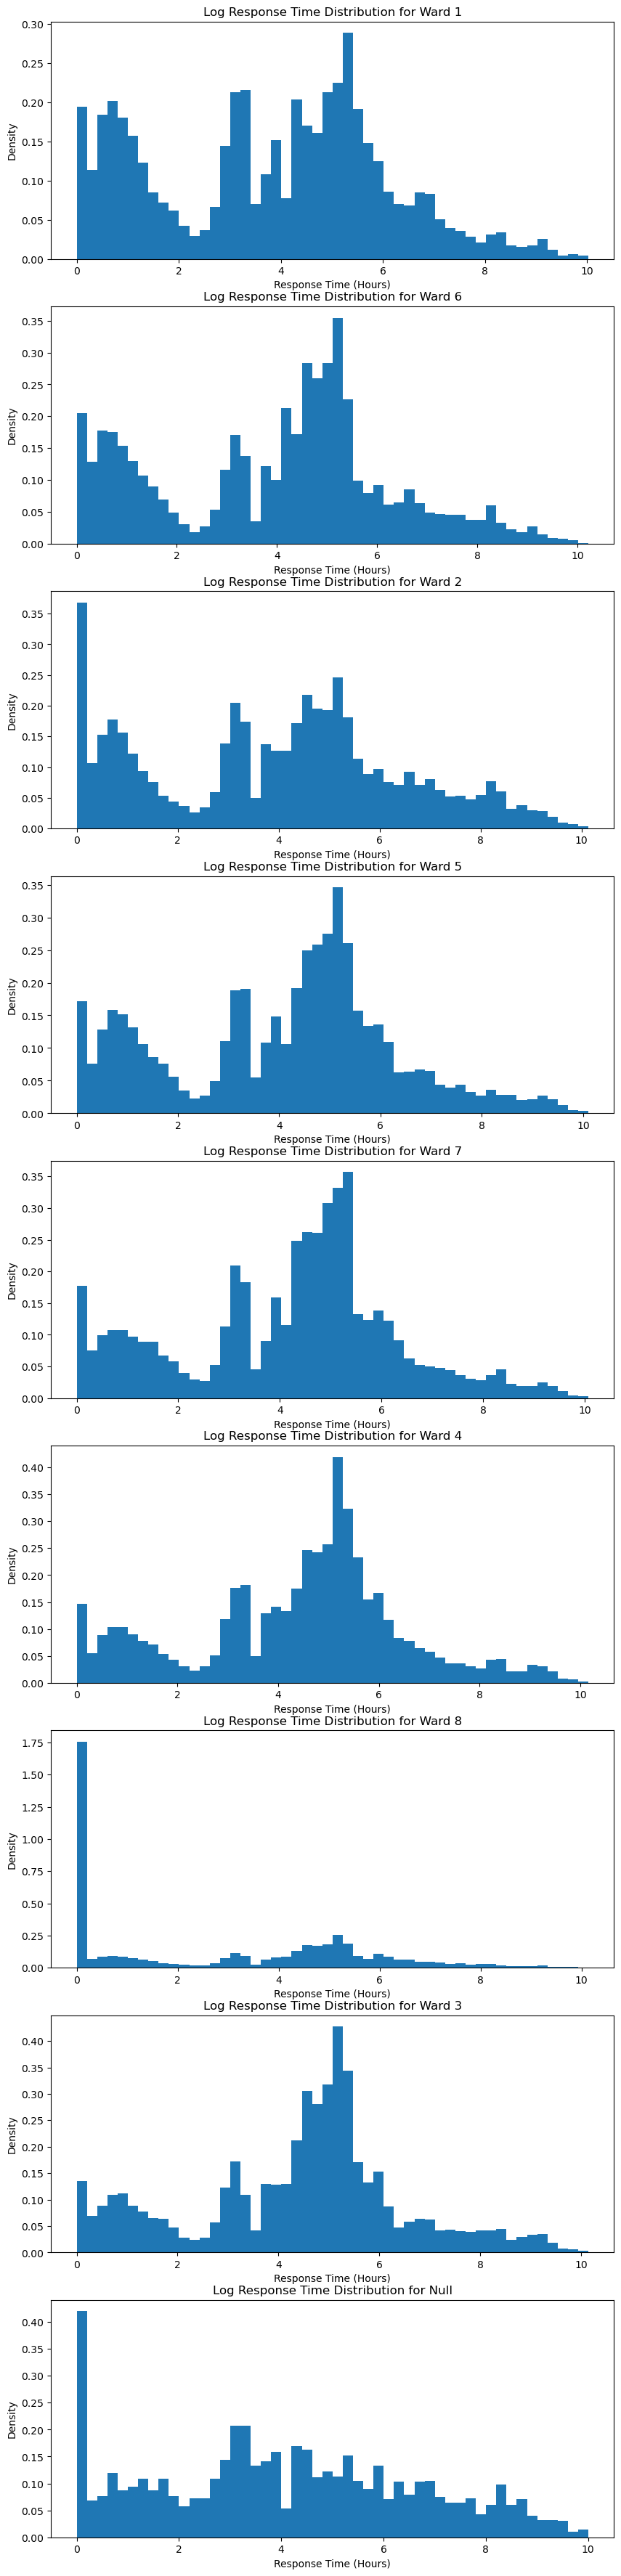

In [9]:
# plot histograms of response times for each ward
# get unique wards
wards = df.dropna(subset=["WARD"])["WARD"].unique()
fig, axs = plt.subplots(len(wards), 1, figsize=(10, 5 * len(wards)))
for i, ward in enumerate(wards):
    print(ward)
    axs[i].hist(np.log(df[df["WARD"] == ward]["RESPONSE_TIME_HOURS"] + 1), bins=50, density=True)
    axs[i].set_title(f"Log Response Time Distribution for {ward}")
    axs[i].set_xlabel("Response Time (Hours)")
    axs[i].set_ylabel("Density")

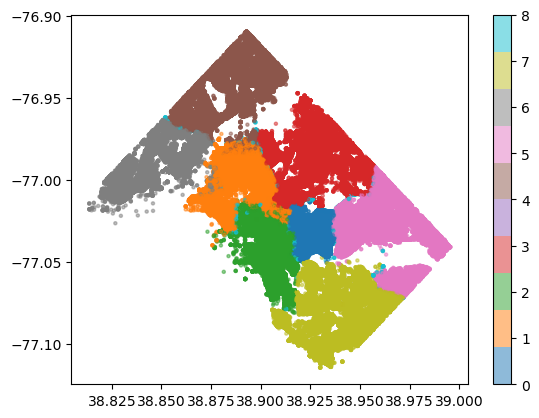

In [10]:
# convert wards to numerical data for plotting
ward_to_num = {ward: i for i, ward in enumerate(df.WARD.unique())}
df['WARD_NUM'] = df['WARD'].map(ward_to_num)

plt.scatter(df.LATITUDE, df.LONGITUDE, alpha=0.5, s=5, c=df.WARD_NUM, cmap='tab10')
plt.colorbar()

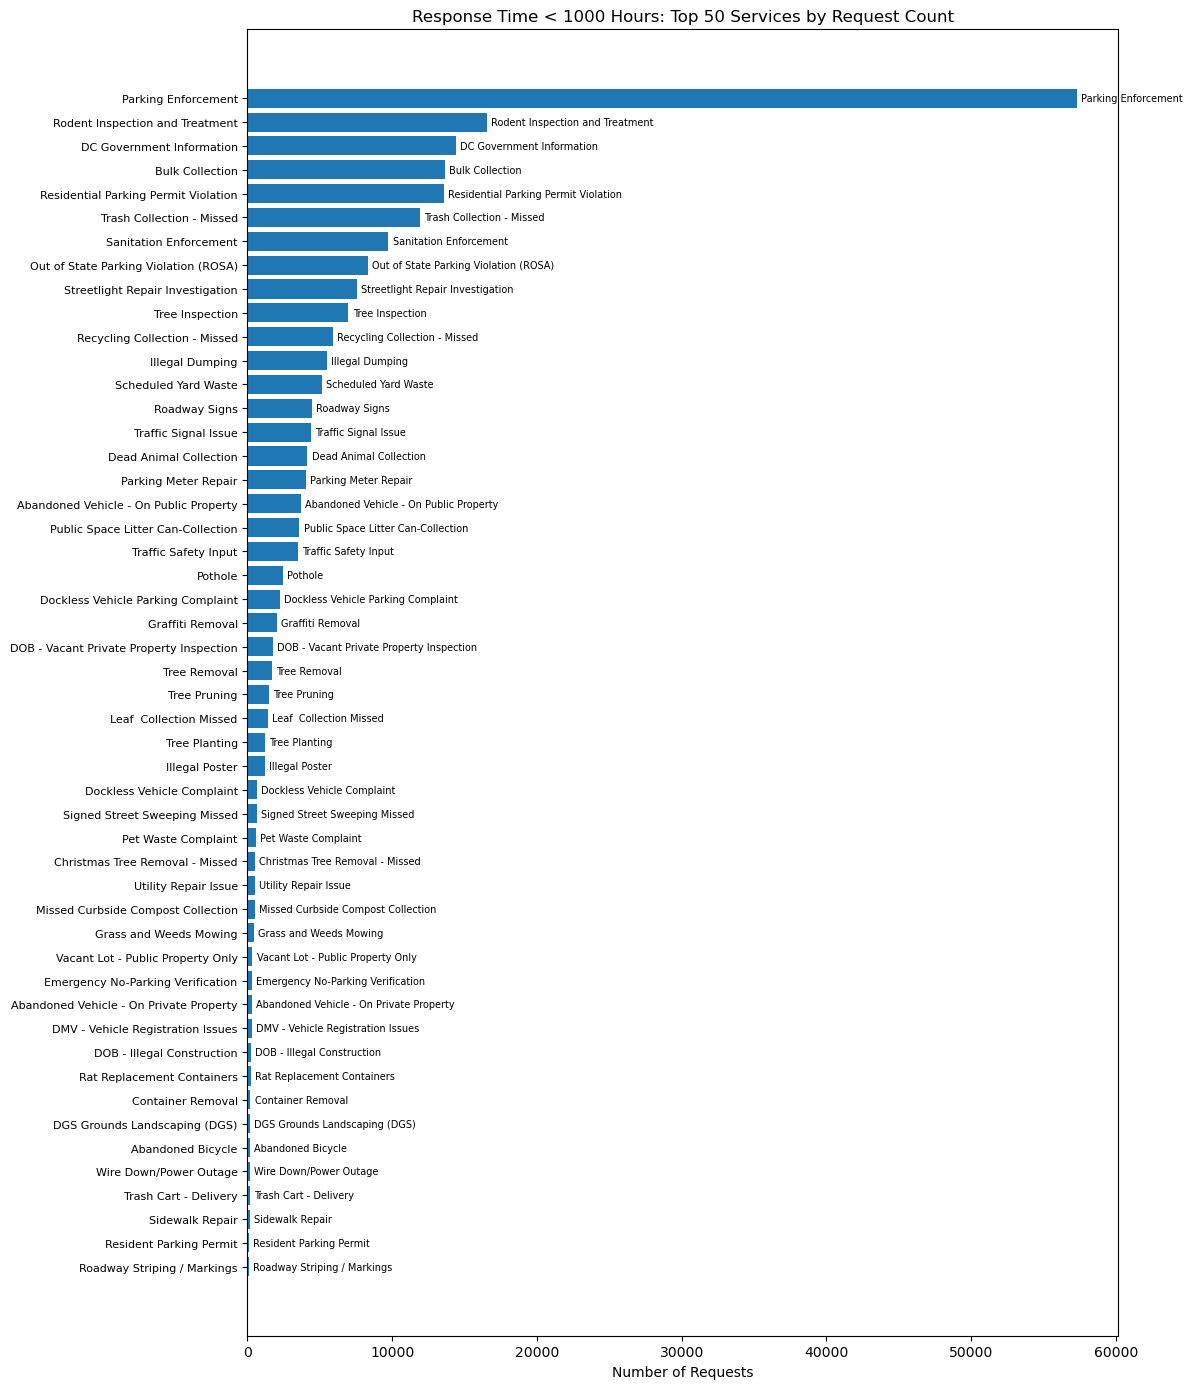

In [17]:
# Analysis 1: Response time < 1000 hours - Top 50 services by count
df_lt_1000 = df[df["RESPONSE_TIME_HOURS"] < 100]
service_counts_lt = df_lt_1000.groupby("SERVICECODEDESCRIPTION").size().sort_values(ascending=False).head(50)

fig, ax = plt.subplots(figsize=(12, 14))
bars = ax.barh(range(len(service_counts_lt)), service_counts_lt.values)
ax.set_yticks(range(len(service_counts_lt)))
ax.set_yticklabels(service_counts_lt.index, fontsize=8)
ax.invert_yaxis()  # Top service at top
ax.set_xlabel("Number of Requests")
ax.set_title("Response Time < 1000 Hours: Top 50 Services by Request Count")
for i, (bar, label) in enumerate(zip(bars, service_counts_lt.index)):
    ax.text(bar.get_width() + max(service_counts_lt) * 0.005, bar.get_y() + bar.get_height()/2,
            label, va="center", fontsize=7, wrap=True)
plt.tight_layout()
plt.show()

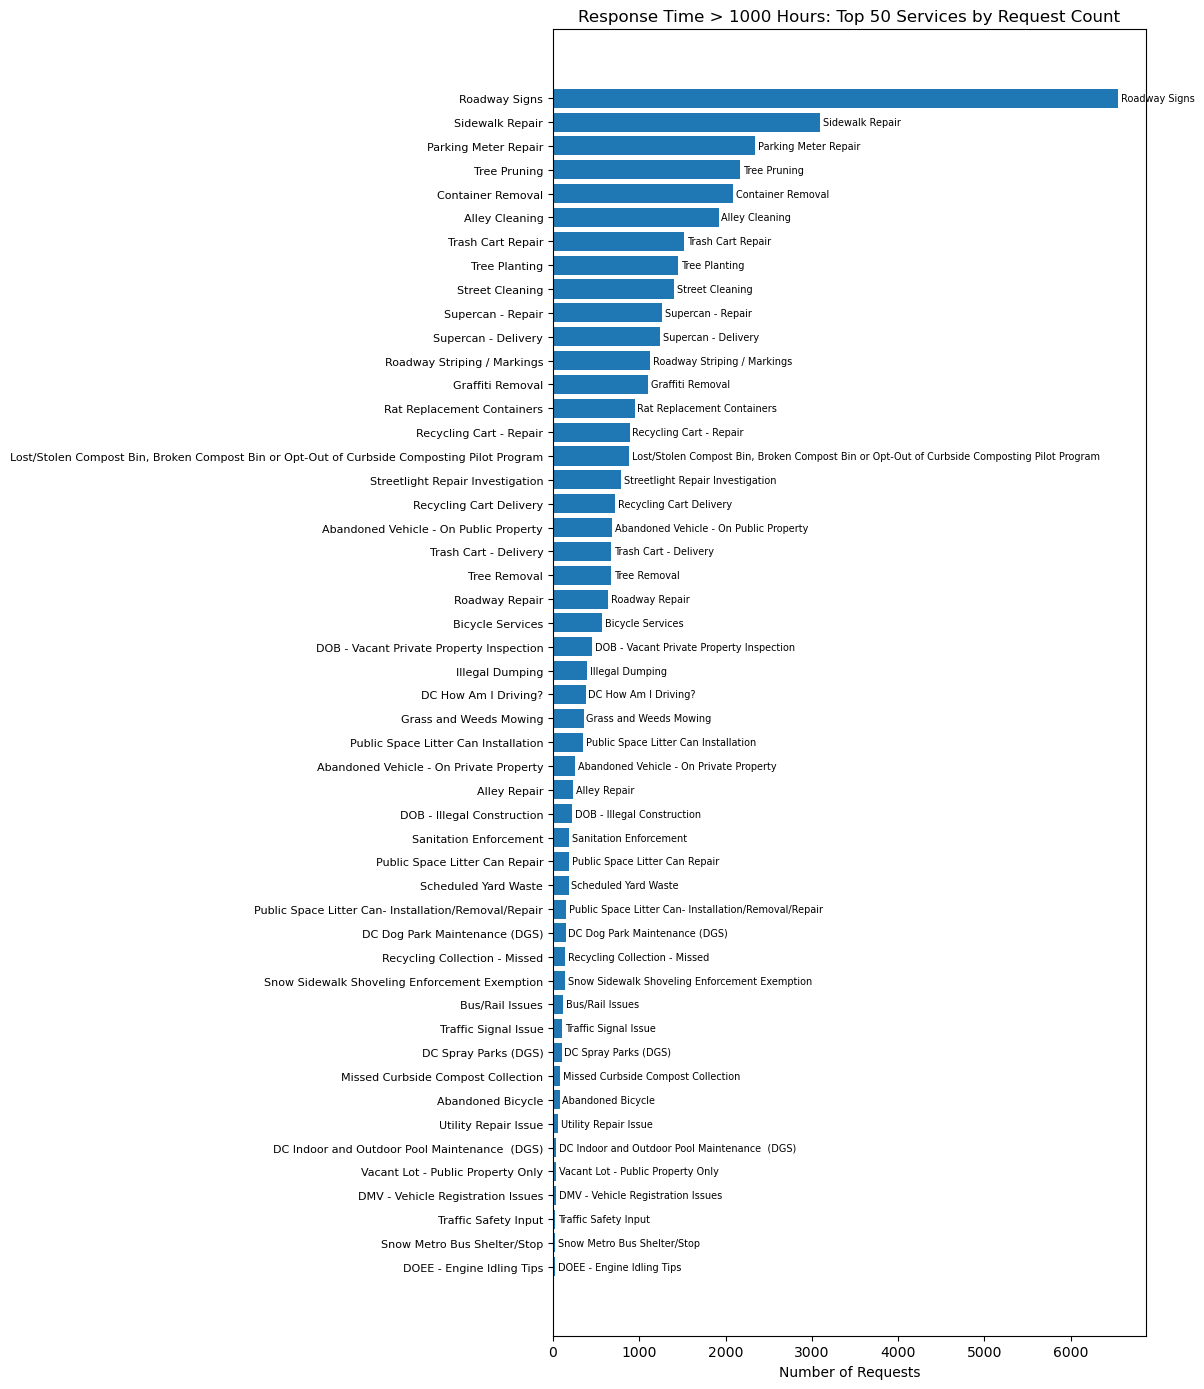

In [18]:
# Analysis 2: Response time > 1000 hours - Top 50 services by count
df_gt_1000 = df[df["RESPONSE_TIME_HOURS"] > 1000]
service_counts_gt = df_gt_1000.groupby("SERVICECODEDESCRIPTION").size().sort_values(ascending=False).head(50)

fig, ax = plt.subplots(figsize=(12, 14))
bars = ax.barh(range(len(service_counts_gt)), service_counts_gt.values)
ax.set_yticks(range(len(service_counts_gt)))
ax.set_yticklabels(service_counts_gt.index, fontsize=8)
ax.invert_yaxis()  # Top service at top
ax.set_xlabel("Number of Requests")
ax.set_title("Response Time > 1000 Hours: Top 50 Services by Request Count")
for i, (bar, label) in enumerate(zip(bars, service_counts_gt.index)):
    ax.text(bar.get_width() + max(service_counts_gt) * 0.005, bar.get_y() + bar.get_height()/2,
            label, va="center", fontsize=7, wrap=True)
plt.tight_layout()
plt.show()

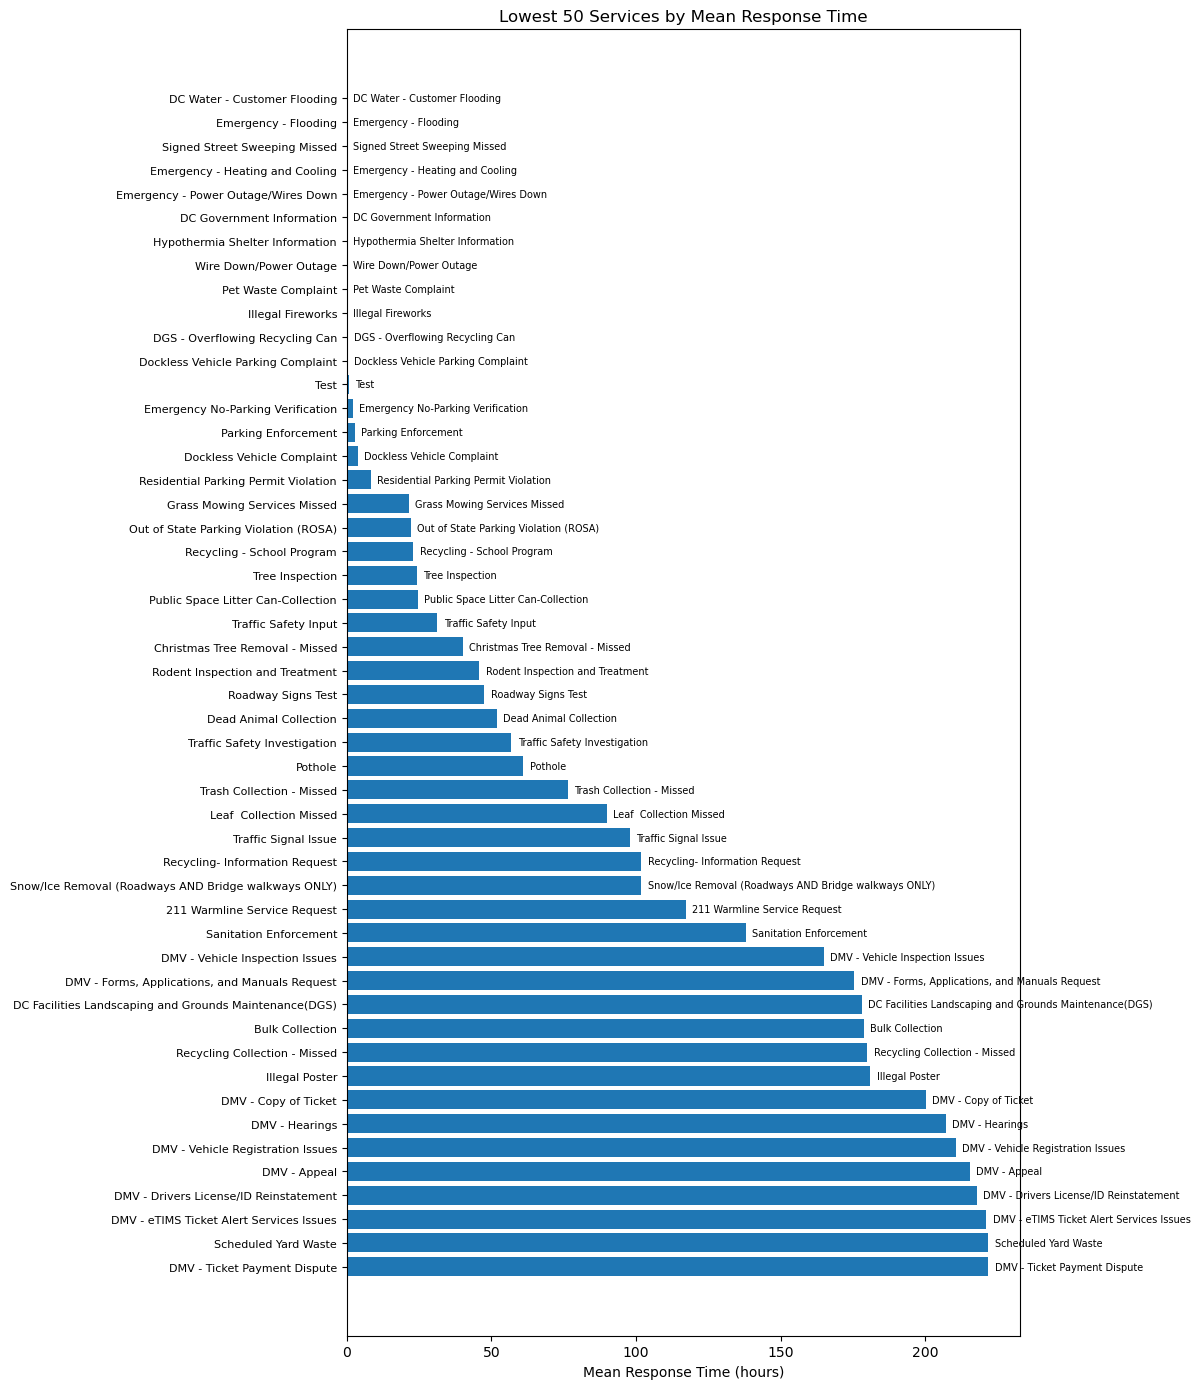

In [12]:
# Mean response time by service type - Lowest 50 services (by lowest mean response time)
mean_response_by_service = df.groupby("SERVICECODEDESCRIPTION")["RESPONSE_TIME_HOURS"].mean().sort_values(ascending=True).head(50)

fig, ax = plt.subplots(figsize=(12, 14))
bars = ax.barh(range(len(mean_response_by_service)), mean_response_by_service.values)
ax.set_yticks(range(len(mean_response_by_service)))
ax.set_yticklabels(mean_response_by_service.index, fontsize=8)
ax.invert_yaxis()  # Lowest mean at top
ax.set_xlabel("Mean Response Time (hours)")
ax.set_title("Lowest 50 Services by Mean Response Time")
for bar, label in zip(bars, mean_response_by_service.index):
    ax.text(bar.get_width() + max(mean_response_by_service) * 0.01, bar.get_y() + bar.get_height()/2,
            label, va="center", fontsize=7)
plt.tight_layout()
plt.show()

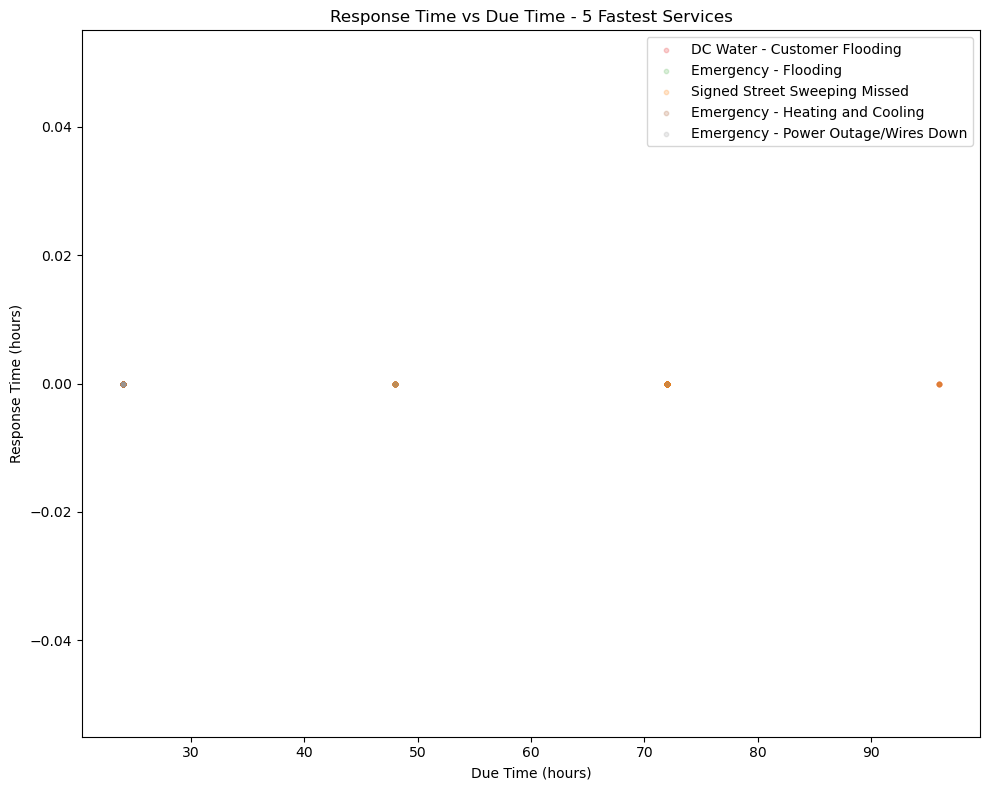

In [13]:
# Filter for 5 services with smallest mean response times
top_5_services = df.groupby("SERVICECODEDESCRIPTION")["RESPONSE_TIME_HOURS"].mean().sort_values(ascending=True).head(5).index.tolist()
df_top5 = df[df["SERVICECODEDESCRIPTION"].isin(top_5_services)]

# Scatter: response time vs due time, colored by service type
fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.cm.Set1(np.linspace(0, 1, 5))
for i, svc in enumerate(top_5_services):
    mask = df_top5["SERVICECODEDESCRIPTION"] == svc
    ax.scatter(df_top5.loc[mask, "DUE_TIME_HOURS"], df_top5.loc[mask, "RESPONSE_TIME_HOURS"],
               alpha=0.2, s=10, c=[colors[i]], label=svc)

ax.set_xlabel("Due Time (hours)")
ax.set_ylabel("Response Time (hours)")
ax.set_title("Response Time vs Due Time - 5 Fastest Services")
ax.legend()
plt.tight_layout()
plt.show()

In [17]:
df_top5.SERVICECODEDESCRIPTION.unique()

<ArrowStringArray>
[      'Signed Street Sweeping Missed', 'Emergency - Power Outage/Wires Down',
        'DC Water - Customer Flooding',     'Emergency - Heating and Cooling',
                'Emergency - Flooding']
Length: 5, dtype: str

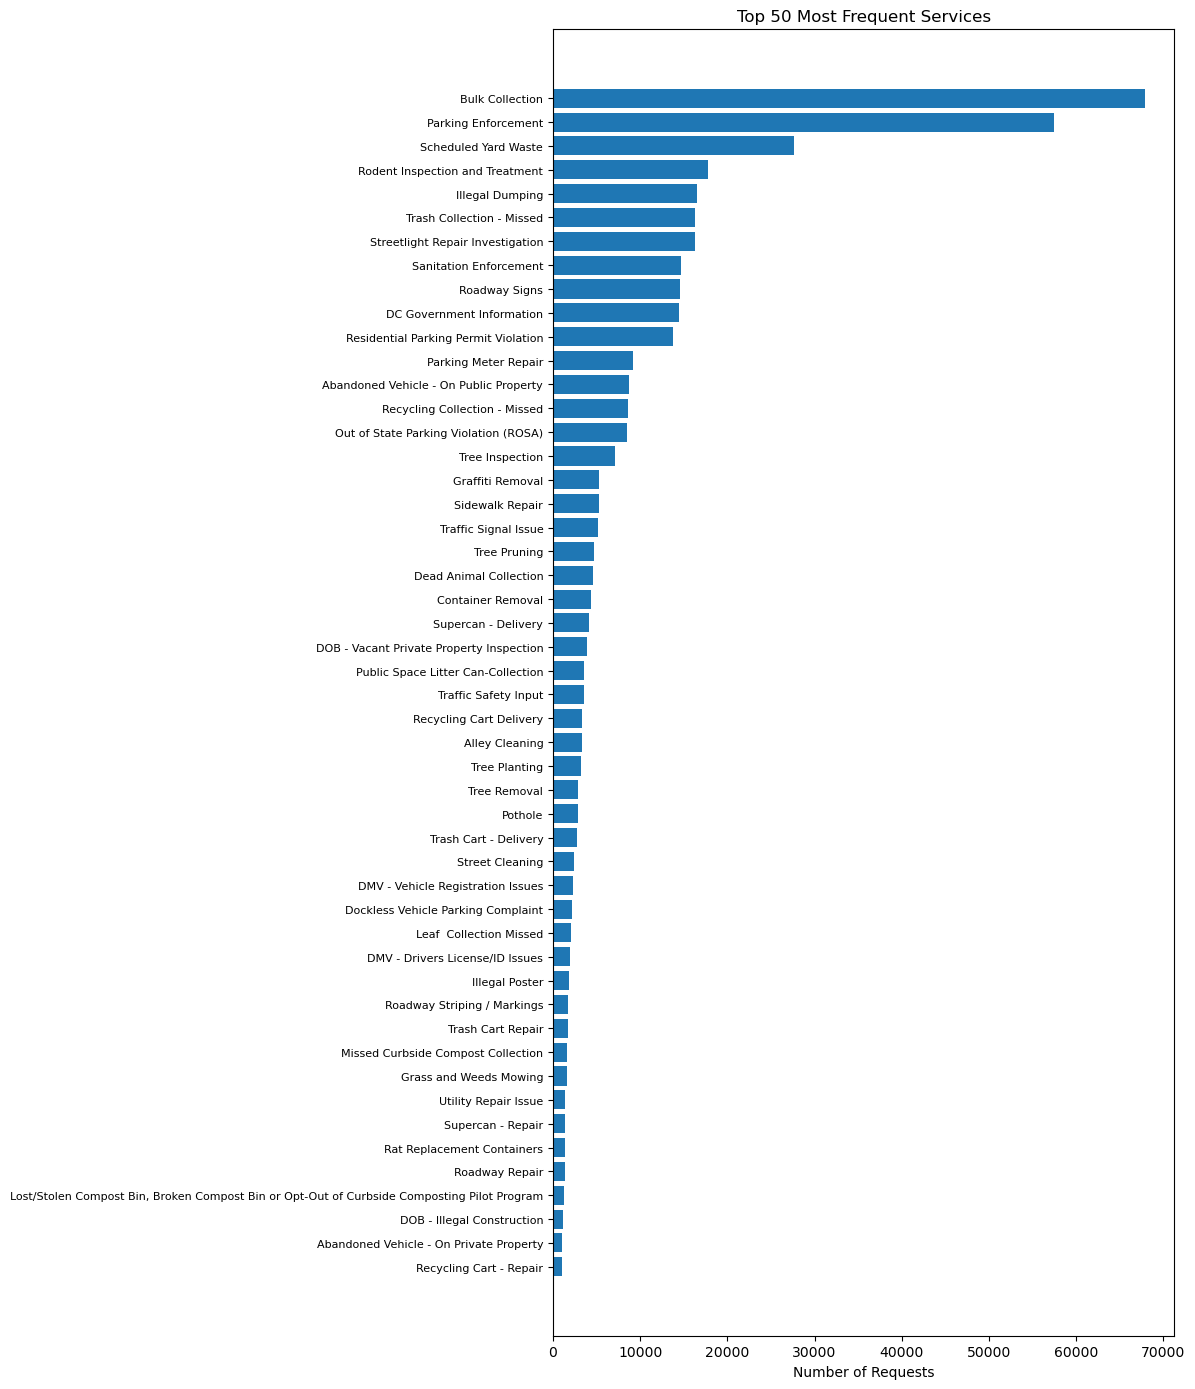

In [18]:
# Frequency of each service type - Top 50 most frequent
service_freq = df["SERVICECODEDESCRIPTION"].value_counts().head(50)

fig, ax = plt.subplots(figsize=(12, 14))
bars = ax.barh(range(len(service_freq)), service_freq.values)
ax.set_yticks(range(len(service_freq)))
ax.set_yticklabels(service_freq.index, fontsize=8)
ax.invert_yaxis()  # Most frequent at top
ax.set_xlabel("Number of Requests")
ax.set_title("Top 50 Most Frequent Services")
plt.tight_layout()
plt.show()